In [68]:
# Importing the main libraries
import pandas as pd
import numpy as np
import random

# Importing the pre-processing methods
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.model_selection import train_test_split

# Importing the regression models
from sklearn.linear_model import LinearRegression

# Importing the plotting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

# Importing the metrics
from sklearn.metrics import confusion_matrix, classification_report



In [2]:
# Importing the csv file
df = pd.read_csv('Paitients_Files_Train.csv')
df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [3]:
df.info()

# We are not dealing with any missing data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [4]:
df.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Preparation

In [5]:
# We will remove the unnecessary columns as per the assignment specification.

df = df.drop(['ID','Insurance'],axis=1)

In [6]:
df['Sepssis'] = pd.Series(np.where(df.Sepssis.values == 'Positive',1,0),df.index)

In [7]:
df

,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepssis
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.6,0.733,34,0
595,0,188,82,14,185,32.0,0.682,22,1
596,0,67,76,0,0,45.3,0.194,46,0
597,1,89,24,19,25,27.8,0.559,21,0


Text(0.5, 0, 'Sepssis')

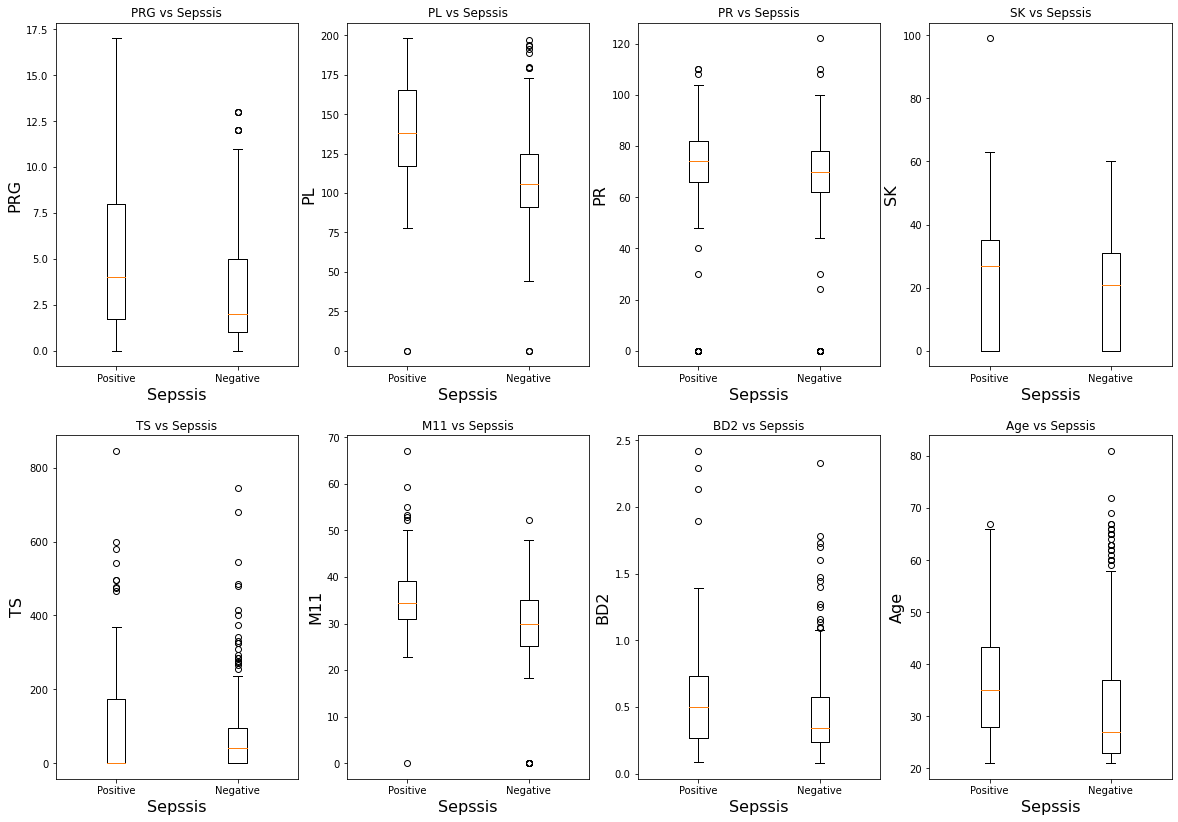

In [8]:
# Initializing the box plots

fig,ax = plt.subplots(2,4,figsize=(20,7))
fig.subplots_adjust(top=3.5,bottom=2)

targetCol = df['Sepssis']

ax[0,0].boxplot([df['PRG'].loc[df['Sepssis']==1],df['PRG'].loc[df['Sepssis']==0]])
ax[0,0].set_xticks([1,2],['Positive','Negative'])
ax[0,0].title.set_text('PRG vs Sepssis')
ax[0,0].set_ylabel('PRG',fontsize=16)
ax[0,0].set_xlabel('Sepssis',fontsize=16)

ax[0,1].boxplot([df['PL'].loc[df['Sepssis']==1],df['PL'].loc[df['Sepssis']==0]])
ax[0,1].set_xticks([1,2],['Positive','Negative'])
ax[0,1].title.set_text('PL vs Sepssis')
ax[0,1].set_ylabel('PL',fontsize=16)
ax[0,1].set_xlabel('Sepssis',fontsize=16)


ax[0,2].boxplot([df['PR'].loc[df['Sepssis']==1],df['PR'].loc[df['Sepssis']==0]])
ax[0,2].set_xticks([1,2],['Positive','Negative'])
ax[0,2].title.set_text('PR vs Sepssis')
ax[0,2].set_ylabel('PR',fontsize=16)
ax[0,2].set_xlabel('Sepssis',fontsize=16)


ax[0,3].boxplot([df['SK'].loc[df['Sepssis']==1],df['SK'].loc[df['Sepssis']==0]])
ax[0,3].set_xticks([1,2],['Positive','Negative'])
ax[0,3].title.set_text('SK vs Sepssis')
ax[0,3].set_ylabel('SK',fontsize=16)
ax[0,3].set_xlabel('Sepssis',fontsize=16)


ax[1,0].boxplot([df['TS'].loc[df['Sepssis']==1],df['TS'].loc[df['Sepssis']==0]])
ax[1,0].set_xticks([1,2],['Positive','Negative'])
ax[1,0].title.set_text('TS vs Sepssis')
ax[1,0].set_ylabel('TS',fontsize=16)
ax[1,0].set_xlabel('Sepssis',fontsize=16)



ax[1,1].boxplot([df['M11'].loc[df['Sepssis']==1],df['M11'].loc[df['Sepssis']==0]])
ax[1,1].set_xticks([1,2],['Positive','Negative'])
ax[1,1].title.set_text('M11 vs Sepssis')
ax[1,1].set_ylabel('M11',fontsize=16)
ax[1,1].set_xlabel('Sepssis',fontsize=16)


ax[1,2].boxplot([df['BD2'].loc[df['Sepssis']==1],df['BD2'].loc[df['Sepssis']==0]])
ax[1,2].set_xticks([1,2],['Positive','Negative'])
ax[1,2].title.set_text('BD2 vs Sepssis')
ax[1,2].set_ylabel('BD2',fontsize=16)
ax[1,2].set_xlabel('Sepssis',fontsize=16)


ax[1,3].boxplot([df['Age'].loc[df['Sepssis']==1],df['Age'].loc[df['Sepssis']==0]])
ax[1,3].set_xticks([1,2],['Positive','Negative'])
ax[1,3].title.set_text('Age vs Sepssis')
ax[1,3].set_ylabel('Age',fontsize=16)
ax[1,3].set_xlabel('Sepssis',fontsize=16)

Text(0.5, 0, 'Age')

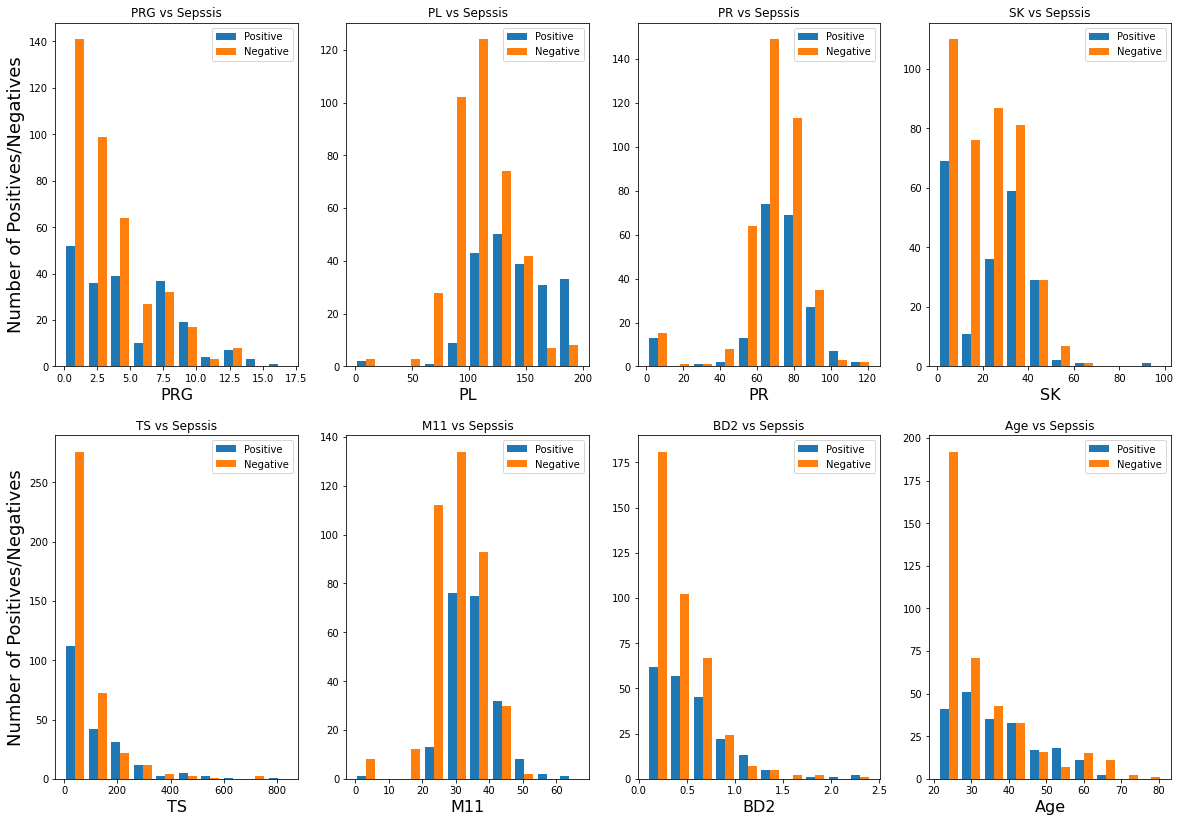

In [9]:
fig,ax = plt.subplots(2,4,figsize=(20,7))

# Increasing space between subplots
fig.subplots_adjust(top=3.5,bottom=2)

targetCol = df['Sepssis']

ax[0,0].hist([df['PRG'].loc[df['Sepssis']==1],df['PRG'].loc[df['Sepssis']==0]])
# ax[0,0].set_xticks([1,2],['Positive','Negative'])
ax[0,0].title.set_text('PRG vs Sepssis')
ax[0,0].legend(['Positive','Negative'])
ax[0,0].set_xlabel('PRG',fontsize=16)
ax[0,0].set_ylabel('Number of Positives/Negatives',fontsize=18)

ax[0,1].hist([df['PL'].loc[df['Sepssis']==1],df['PL'].loc[df['Sepssis']==0]])
ax[0,1].title.set_text('PL vs Sepssis')
ax[0,1].legend(['Positive','Negative'])
ax[0,1].set_xlabel('PL',fontsize=16)


ax[0,2].hist([df['PR'].loc[df['Sepssis']==1],df['PR'].loc[df['Sepssis']==0]])
ax[0,2].title.set_text('PR vs Sepssis')
ax[0,2].legend(['Positive','Negative'])
ax[0,2].set_xlabel('PR',fontsize=16)


ax[0,3].hist([df['SK'].loc[df['Sepssis']==1],df['SK'].loc[df['Sepssis']==0]])
ax[0,3].title.set_text('SK vs Sepssis')
ax[0,3].legend(['Positive','Negative'])
ax[0,3].set_xlabel('SK',fontsize=16)


ax[1,0].hist([df['TS'].loc[df['Sepssis']==1],df['TS'].loc[df['Sepssis']==0]])
ax[1,0].title.set_text('TS vs Sepssis')
ax[1,0].legend(['Positive','Negative'])
ax[1,0].set_xlabel('TS',fontsize=16)
ax[1,0].set_ylabel('Number of Positives/Negatives',fontsize=18)

ax[1,1].hist([df['M11'].loc[df['Sepssis']==1],df['M11'].loc[df['Sepssis']==0]])
ax[1,1].title.set_text('M11 vs Sepssis')
ax[1,1].legend(['Positive','Negative'])
ax[1,1].set_xlabel('M11',fontsize=16)

ax[1,2].hist([df['BD2'].loc[df['Sepssis']==1],df['BD2'].loc[df['Sepssis']==0]])
ax[1,2].title.set_text('BD2 vs Sepssis')
ax[1,2].legend(['Positive','Negative'])
ax[1,2].set_xlabel('BD2',fontsize=16)

ax[1,3].hist([df['Age'].loc[df['Sepssis']==1],df['Age'].loc[df['Sepssis']==0]])
ax[1,3].title.set_text('Age vs Sepssis')
ax[1,3].legend(['Positive','Negative'])
ax[1,3].set_xlabel('Age',fontsize=16)

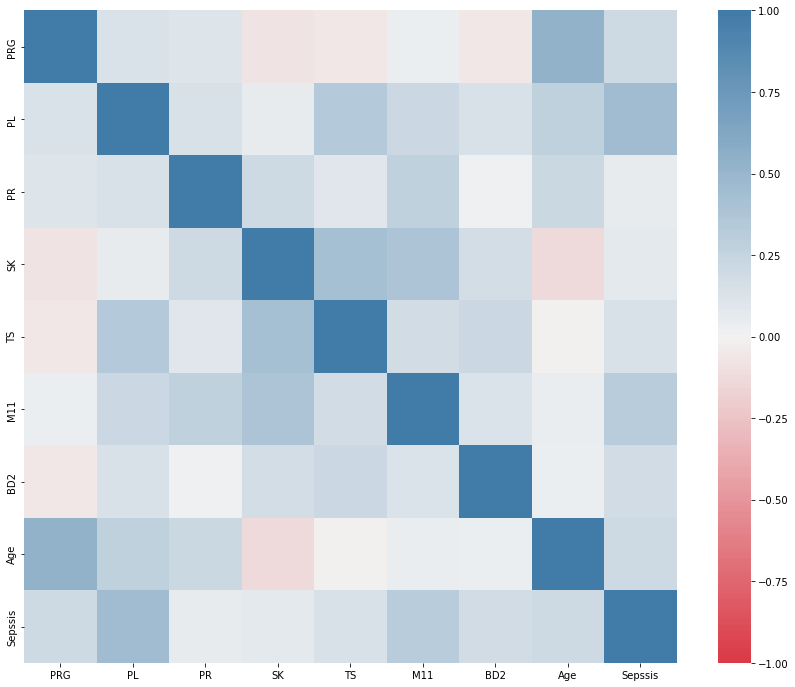

In [36]:
# Generating a heatmap to know the relations between columns 

fig, ax = plt.subplots(figsize=(15, 12))
corr = df.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(10, 240, n=200),square=True)

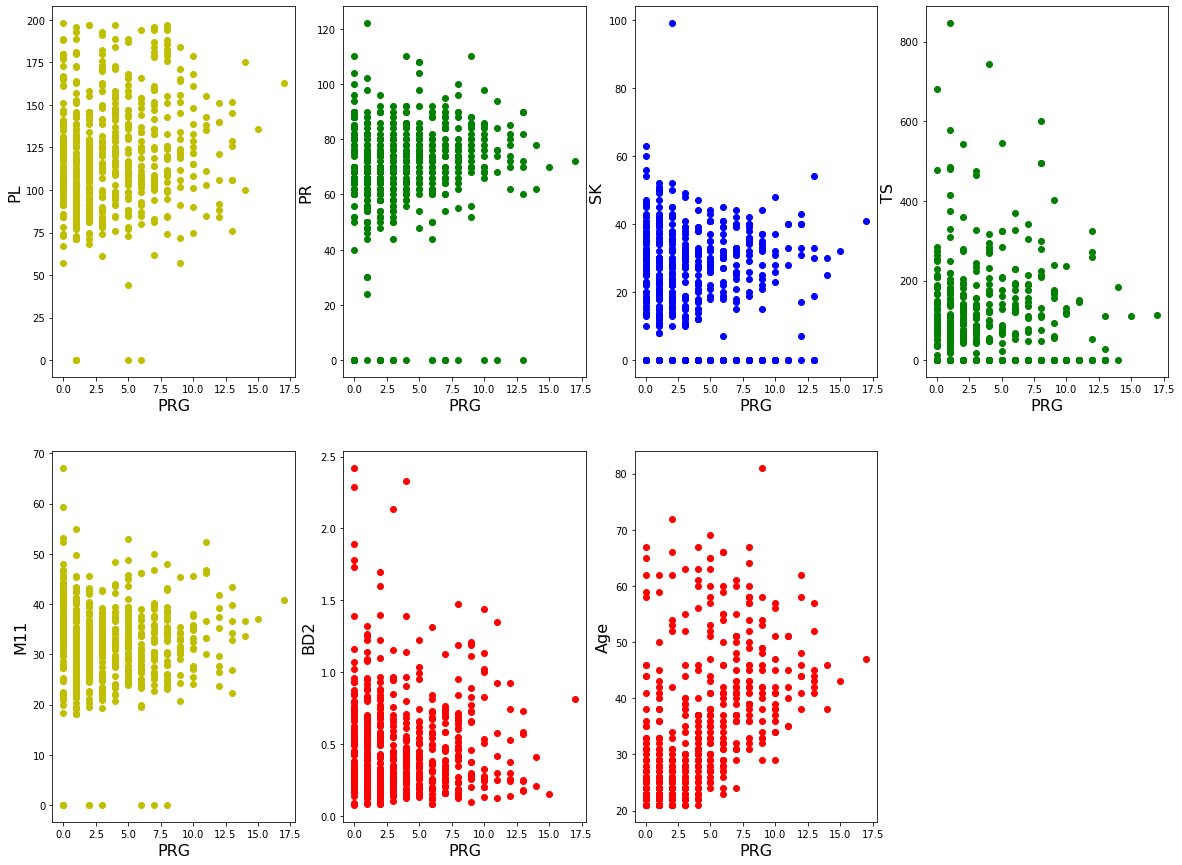

In [10]:
# The relations of other columns with PRG

fig = plt.subplots(figsize=(20,15))
colours = ['r','b','g','y']
mainCol = df['PRG']

for i in range(1,len(df.columns)-1):
    
    ax = plt.subplot(2,4,i)
    ax.scatter(mainCol,df[df.columns[i]],color = random.choice(colours))
    ax.set_xlabel('PRG',fontsize=16)
    ax.set_ylabel(df.columns[i],fontsize=16)

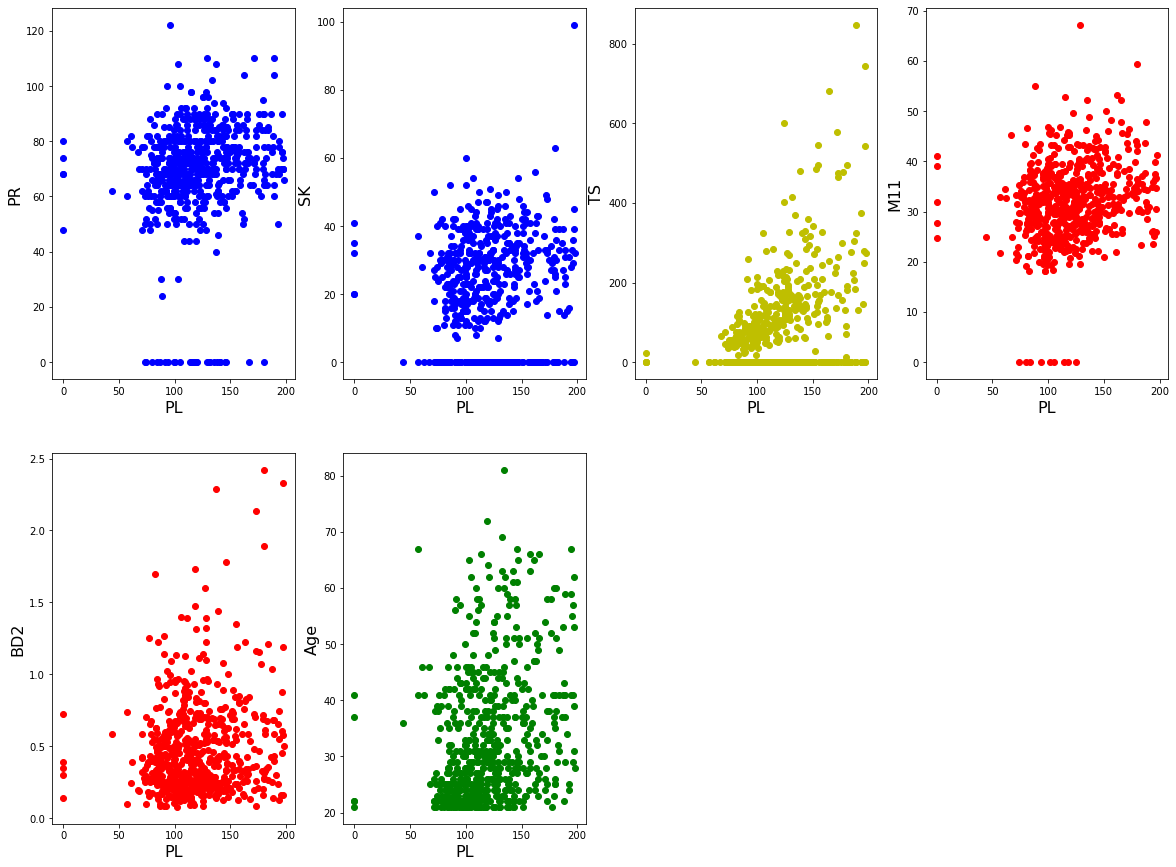

In [11]:
# The relations of other columns with PL

fig = plt.subplots(figsize=(20,15))
colours = ['r','b','g','y','black']
mainCol = df['PL']

for i in range(2,len(df.columns)-1):
    
    ax = plt.subplot(2,4,i-1)
    ax.scatter(mainCol,df[df.columns[i]],color = random.choice(colours))
    ax.set_xlabel('PL',fontsize=16)
    ax.set_ylabel(df.columns[i],fontsize=16)

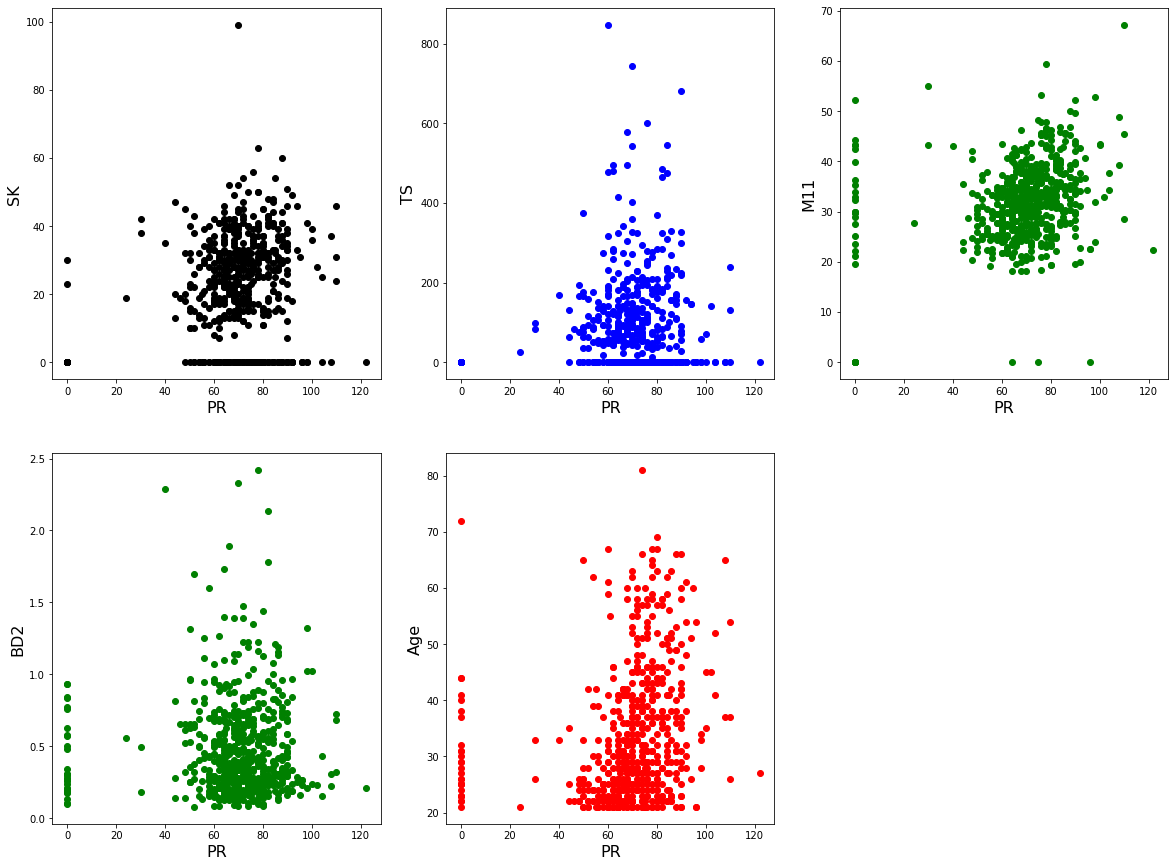

In [12]:
# The relations of other columns with PR

fig = plt.subplots(figsize=(20,15))
colours = ['r','b','g','y','black']
mainCol = df['PR']

for i in range(3,len(df.columns)-1):
    
    ax = plt.subplot(2,3,i-2)
    ax.scatter(mainCol,df[df.columns[i]],color = random.choice(colours))
    ax.set_xlabel('PR',fontsize=16)
    ax.set_ylabel(df.columns[i],fontsize=16)

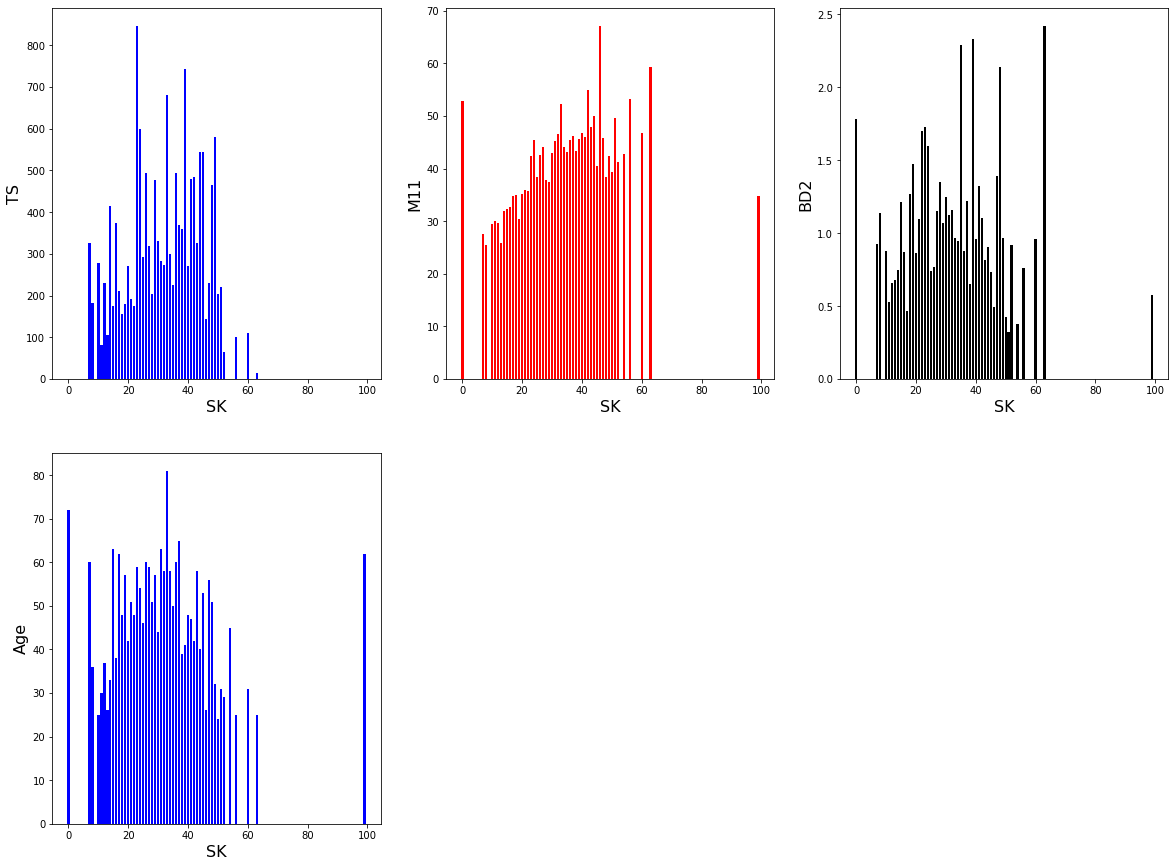

In [13]:
# The relations of other columns with SK

fig = plt.subplots(figsize=(20,15))
colours = ['r','b','g','y','black']
mainCol = df['SK']

for i in range(4,len(df.columns)-1):
    ax = plt.subplot(2,3,i-3)
    ax.bar(mainCol,df[df.columns[i]],color = random.choice(colours))
    ax.set_xlabel('SK',fontsize=16)
    ax.set_ylabel(df.columns[i],fontsize=16)

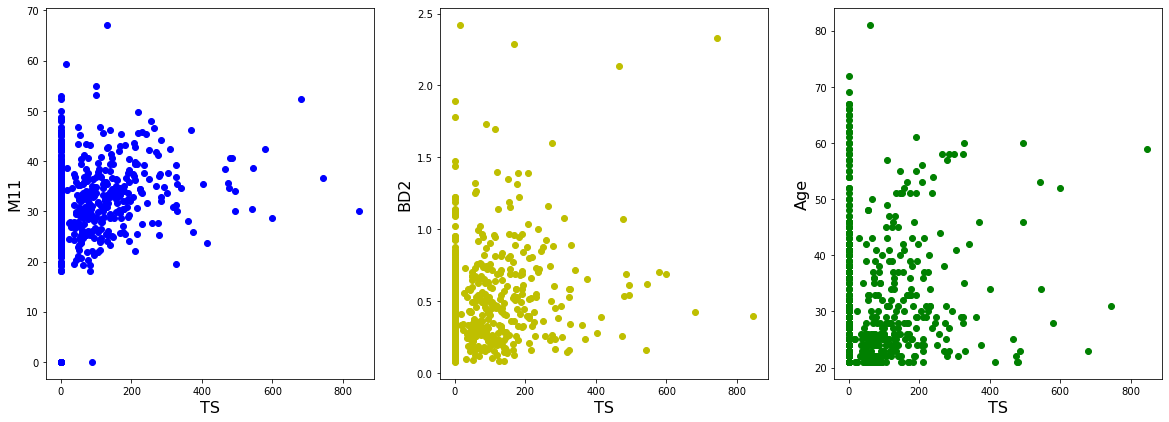

In [14]:
# The relations of other columns with TS

fig = plt.subplots(figsize=(20,15))
colours = ['r','b','g','y','black']
mainCol = df['TS']

for i in range(5,len(df.columns)-1):
    
    ax = plt.subplot(2,3,i-4)
    ax.scatter(mainCol,df[df.columns[i]],color = random.choice(colours))
    ax.set_xlabel('TS',fontsize=16)
    ax.set_ylabel(df.columns[i],fontsize=16)

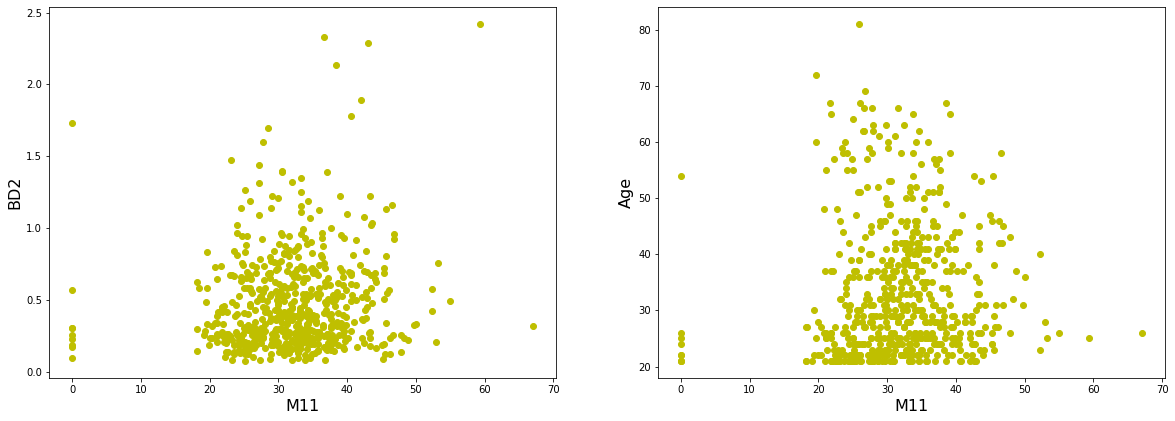

In [15]:
# The relations of other columns with M11

fig = plt.subplots(figsize=(20,15))
colours = ['r','b','g','y','black']
mainCol = df['M11']

for i in range(6,len(df.columns)-1):
    
    ax = plt.subplot(2,2,i-5)
    ax.scatter(mainCol,df[df.columns[i]],color = random.choice(colours))
    ax.set_xlabel('M11',fontsize=16)
    ax.set_ylabel(df.columns[i],fontsize=16)

Text(0, 0.5, 'Age')

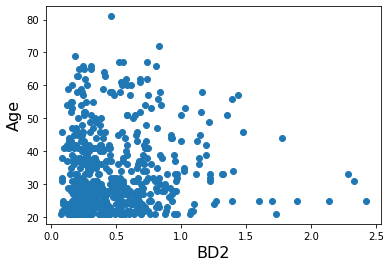

In [16]:
# The relations of other columns with BD2

mainCol = df['BD2']

plt.scatter(mainCol,df['Age'])
plt.xlabel('BD2',fontsize=16)
plt.ylabel(df.columns[i],fontsize=16)

## Data Modelling

In [59]:
# Creating the regression and classifier objects

regressor = LinearRegression()

x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1])

### Linear Regression

In [60]:
regressor.fit(x_train,y_train)

LinearRegression()

In [65]:
y_pred = regressor.predict(x_test)
y_pred = np.where(y_pred>0.5,1,0)

In [69]:
confusion_matrix(y_test,y_pred)

array([[86, 16],
       [21, 27]])

In [86]:
predicted = y_pred.tolist()
actual = y_test.tolist()

print(classification_report(y_test,y_pred,target_names=['Positive','Negative']))

              precision    recall  f1-score   support

    Positive       0.80      0.84      0.82       102
    Negative       0.63      0.56      0.59        48

    accuracy                           0.75       150
   macro avg       0.72      0.70      0.71       150
weighted avg       0.75      0.75      0.75       150

